In [2]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [3]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [4]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [5]:
#df = create_input_data.read_data(csv_file_name="../data/processed/past_25_completed_qm.csv", parse_dates_col=[4,5,6])
df = create_input_data.read_data(csv_file_name="../data/processed/correct_anon_past_35_completed_qm.csv", parse_dates_col=[4,5,6])
df

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,9084275,5a1c85eb8bc9d4da20ce12b96ecc7bb9d79d3ef991e990...,38112a802292edea407a0678c9c75259cba6473c7acc62...,COMPLETED,2022-02-01 00:10:00,2022-02-01 00:10:02,2022-02-01 18:10:39,1,1,2880,...,0,0,0,0,0,0,0,0,0,0
1,9084279,b4b4df9343fe9f7110ec15863fb5df13fbd20268383ba9...,9490a70089cec5b24a43f5f535efc92180fc5383256414...,COMPLETED,2022-02-01 00:11:44,2022-02-01 07:44:39,2022-02-01 09:00:46,78,6,180,...,0,0,0,0,0,0,0,0,0,0
2,9084280,c593da51b38e5fd95cb891ec53a4b70c41ca189bf4b92d...,3a61323a47592f74d9ca0004a066b2019b8fc1d4c53283...,COMPLETED,2022-02-01 00:12:27,2022-02-01 00:12:27,2022-02-01 00:12:39,68,1,1,...,0,0,0,0,0,0,0,0,0,0
3,9084291,db3b1cee65585e6744e72478a737eafaa23ce99e81344e...,118341ad5b87466ce69926005d0d6ba762bf86b8996da7...,COMPLETED,2022-02-01 00:16:45,2022-02-01 04:43:31,2022-02-01 06:15:04,64,1,2880,...,0,0,0,0,0,0,0,0,0,0
4,9084294,bb3cdc72e4a6895d67d00ccd3c9cf0f65bdc59f32dfa9e...,664af438b9c1ef9ba68a8105b0ce50f87b8bc462486043...,COMPLETED,2022-02-01 00:17:49,2022-02-01 00:17:51,2022-02-01 00:58:55,64,1,58,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,10056827,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:21,2022-08-01 00:02:54,2022-08-01 00:26:35,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323212,10056828,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:58:18,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323213,10056829,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:41:48,48,1,120,...,0,0,0,0,0,0,0,0,0,0
323214,10056831,4c6876a9c556f9039eb938f387f82f71400b3eafa372b2...,140bedbf9c3f6d56a9846d2ba7088798683f4da0c24823...,COMPLETED,2022-07-31 23:58:28,2022-08-01 03:57:32,2022-08-01 06:07:16,100,2,180,...,0,0,0,0,0,0,0,0,0,0


In [6]:
num_zeros, non_zeros = explore_util.get_num_of_zeros(df,'qm25')


Number of zeros in column: qm25: 233672
Number of elements in the column: 323216
Non-zero elements in the column: 89544


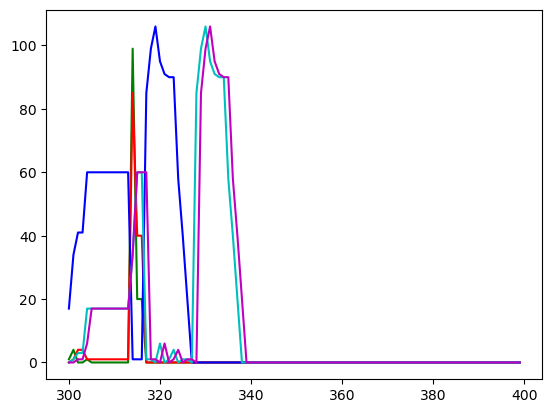

In [7]:
explore_util.explore_five_plots(df=df,col_name_list=['qm1','qm2','qm12','qm23','qm24'], num_col=5, color_list=['g','r','b','c','m'],lo=300, hi=400)

In [8]:
df = build_features.remove_default_cols(df)
df

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
0,1,1,2880,0,131060,143,20382,7955377,1080,0,...,0,0,0,0,0,0,0,0,0,0
1,78,6,180,452,131060,143,20382,7955377,76,0,...,0,0,0,0,0,0,0,0,0,0
2,68,1,1,0,131240,144,20382,7955377,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64,1,2880,266,131100,142,20383,7955378,91,0,...,0,0,0,0,0,0,0,0,0,0
4,64,1,58,0,133980,143,20383,7955378,41,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,4,898116,394,22918,9692906,23,0,...,0,0,0,0,0,0,0,0,0,0
323212,48,1,120,5,898236,395,22918,9692906,54,0,...,0,0,0,0,0,0,0,0,0,0
323213,48,1,120,5,898356,396,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
323214,100,2,180,239,898356,396,22918,9692906,129,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df = build_features.slice_df(df,1000,323216)
df

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,1,1,120,10,268796,275,20395,7967258,10,0,...,0,0,1,0,0,0,0,0,0,0
1001,1,1,120,9,268916,276,20395,7967258,9,0,...,0,0,1,0,0,0,0,0,0,0
1002,1,1,120,9,269036,277,20395,7967258,9,0,...,0,0,1,0,0,0,0,0,0,0
1003,1,1,120,9,269156,278,20395,7967258,8,0,...,0,0,1,0,0,0,0,0,0,0
1004,1,1,120,9,269276,279,20395,7967258,8,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,4,898116,394,22918,9692906,23,0,...,0,0,0,0,0,0,0,0,0,0
323212,48,1,120,5,898236,395,22918,9692906,54,0,...,0,0,0,0,0,0,0,0,0,0
323213,48,1,120,5,898356,396,22918,9692906,38,0,...,0,0,0,0,0,0,0,0,0,0
323214,100,2,180,239,898356,396,22918,9692906,129,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
### Remove the queue_minutes column from the training set
X_historydata=build_features.remove_specific_col(df,'queue_minutes')
Y_waittimedata=df['queue_minutes']

In [11]:
X_historydata
#Y_waittimedata

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,qm1,qm2,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
1000,1,1,120,268796,275,20395,7967258,10,0,0,...,0,0,1,0,0,0,0,0,0,0
1001,1,1,120,268916,276,20395,7967258,9,0,0,...,0,0,1,0,0,0,0,0,0,0
1002,1,1,120,269036,277,20395,7967258,9,0,0,...,0,0,1,0,0,0,0,0,0,0
1003,1,1,120,269156,278,20395,7967258,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1004,1,1,120,269276,279,20395,7967258,8,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,48,1,120,898116,394,22918,9692906,23,0,0,...,0,0,0,0,0,0,0,0,0,0
323212,48,1,120,898236,395,22918,9692906,54,0,0,...,0,0,0,0,0,0,0,0,0,0
323213,48,1,120,898356,396,22918,9692906,38,0,0,...,0,0,0,0,0,0,0,0,0,0
323214,100,2,180,898356,396,22918,9692906,129,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_historydata_train_rm, X_historydata_test_rm, Y_waittimedata_train, Y_waittimedata_test=build_features.split_training_test_data(X_historydata, Y_waittimedata)

shapes: X train: (241662, 43) Y train: (241662,)
shapes: X test: (80554, 43)Y test: (80554,)


In [13]:
X_historydata_test = build_features.remove_specific_col(X_historydata_test_rm,'run_minutes')
X_historydata_train = build_features.remove_specific_col(X_historydata_train_rm,'run_minutes')

In [14]:
X_historydata_train

,reqcpus,nnodes,max_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,qm1,qm2,qm3,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
217891,48,1,120,152340,84,22226,9143715,0,1,0,...,0,0,0,0,0,0,0,0,0,0
61850,120,5,120,617365,358,20807,8085582,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57136,2,1,60,254110,174,20804,8084622,1,0,0,...,219,201,193,192,177,132,70,59,48,48
121508,240,20,6,3642,14,21179,8272622,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182686,16,1,119,18060,8,21894,8932031,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120879,64,1,2880,45055,87,21169,8268322,1,39,35,...,1,71,68,68,67,67,67,67,67,65
260178,16,1,119,0,0,22480,9318710,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132932,96,2,15,39120,27,21315,8345656,0,0,0,...,0,0,0,6,0,0,0,0,0,0
147867,44,1,2880,289270,160,21442,8411807,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_historydata_norm, scaler = build_features.standardization(X_historydata_train)

MinMaxScaler()
data max = [3.276800e+04 2.560000e+02 9.000000e+03 1.414325e+06 7.010000e+02
 2.291800e+04 9.692906e+06 6.670000e+02 3.154000e+03 3.154000e+03
 3.155000e+03 3.156000e+03 3.158000e+03 3.164000e+03 3.191000e+03
 3.192000e+03 3.193000e+03 3.193000e+03 3.195000e+03 3.195000e+03
 3.205000e+03 3.239000e+03 3.156000e+03 3.158000e+03 3.164000e+03
 3.191000e+03 3.192000e+03 3.269000e+03 3.193000e+03 3.195000e+03
 3.284000e+03 3.205000e+03 3.287000e+03 3.239000e+03 3.288000e+03
 3.290000e+03 3.239000e+03 3.291000e+03 3.269000e+03 3.269000e+03
 3.269000e+03 3.284000e+03]
data min = [1.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 2.039500e+04 7.967258e+06 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+

In [25]:
from importlib import reload
reload(train_model)
nodes = [7,22,30,32,42,64,100,125,128,200,256]
#nodes = [42]
h5_file_base="../models/2Layer_35past_qm_model_"
epochs=500
batch_size=64
validation_spilt=0.2
for node in nodes:
    h5_file = h5_file_base + str(node) + ".h5"
    ## hidden layer 1 has 100 nodes
    model = train_model.create_new_model_for_exploration(input_shape=42,layers=2,nodes=node)
    checkpoint_cb,early_stopping_cb = train_model.create_checkpoint_cb(h5_file=h5_file)
    model, hist = train_model.train_model_cb_cp(X_historydata_norm, Y_waittimedata_train, model,checkpoint_cb,
                early_stopping_cb,h5_file, epochs, batch_size, validation_spilt)

Epoch 1/500
3021/3021 [==============================] - 2s 659us/step - loss: 221987.4062 - mae: 129.3122 - val_loss: 229609.0312 - val_mae: 124.5492
Epoch 2/500
3021/3021 [==============================] - 2s 625us/step - loss: 205009.7969 - mae: 120.7370 - val_loss: 221840.0781 - val_mae: 124.3456
Epoch 3/500
3021/3021 [==============================] - 2s 638us/step - loss: 198120.7656 - mae: 119.9581 - val_loss: 214570.8281 - val_mae: 119.6804
Epoch 4/500
3021/3021 [==============================] - 2s 642us/step - loss: 190558.2344 - mae: 115.7461 - val_loss: 206949.2344 - val_mae: 118.7519
Epoch 5/500
3021/3021 [==============================] - 2s 628us/step - loss: 182784.1562 - mae: 113.8936 - val_loss: 200732.2344 - val_mae: 126.0560
Epoch 6/500
3021/3021 [==============================] - 2s 638us/step - loss: 175284.7656 - mae: 112.3655 - val_loss: 192740.8281 - val_mae: 111.5768
Epoch 7/500
3021/3021 [==============================] - 2s 635us/step - loss: 167810.7031 - m

In [28]:
from importlib import reload
from tensorflow.keras.models import load_model

nodes = [7,22,30,32,42,64,100,125,128,200,256]
h5_file_base="../models/2Layer_35past_qm_model_"

models = {}
for node in nodes:
    models[str(node)] = load_model(h5_file_base + str(node)+".h5")


In [29]:
#nodes = [7,22,30,32,42,64,100,125,128,200,256]
for node in nodes:
    predict_model.evaluate(models[str(node)],scaler,X_historydata_test, Y_waittimedata_test)

2518/2518 [==============================] - 1s 446us/step - loss: 100954.4844 - mae: 84.3932
loss — -> 100954.484375
mae — -> 84.39320373535156
2518/2518 [==============================] - 1s 434us/step - loss: 94001.6641 - mae: 79.4995
loss — -> 94001.6640625
mae — -> 79.49949645996094
2518/2518 [==============================] - 1s 445us/step - loss: 105634.5781 - mae: 80.9314
loss — -> 105634.578125
mae — -> 80.9314193725586
2518/2518 [==============================] - 1s 430us/step - loss: 100975.8203 - mae: 81.1173
loss — -> 100975.8203125
mae — -> 81.11727142333984
2518/2518 [==============================] - 1s 442us/step - loss: 89394.3594 - mae: 74.8051
loss — -> 89394.359375
mae — -> 74.80510711669922
2518/2518 [==============================] - 1s 439us/step - loss: 89698.8828 - mae: 78.9112
loss — -> 89698.8828125
mae — -> 78.91120147705078
2518/2518 [==============================] - 1s 443us/step - loss: 76671.2734 - mae: 74.1200
loss — -> 76671.2734375
mae — -> 74.11998

In [30]:
from importlib import reload
from sklearn.metrics import r2_score

reload(predict_model)
y_pred_model={}
score = {}
#nodes = [7,22,30,32,42,64,100,125,128,200,256]
for node in nodes:
    print("node: " + str(node)+"\n")
    y_pred_model[str(node)] = predict_model.predict_and_compare(models[str(node)],scaler, X_historydata_test, Y_waittimedata_test)
    score[str(node)]=r2_score(Y_waittimedata_test.to_numpy(),y_pred_model[str(node)])

node: 7

2518/2518 [==============================] - 1s 370us/step
y_pred shape : (80554, 1)
--- inspecting prediction values --- 
number of negative numbers  :14242
number of zeros in the data : 0
number of positive numbers  :66312

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 49440
number of positive numbers  :31114

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 14242
number of positive numbers  :66312

node: 22

2518/2518 [==============================] - 1s 380us/step
y_pred shape : (80554, 1)
--- inspecting prediction values --- 
number of negative numbers  :14299
number of zeros in the data : 0
number of positive numbers  :66255

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 49440
number of positive numbers  :31114

 ---inspecting prediction values after clipping negative values to zer

In [31]:
print(X_historydata_test_rm)
run_mins = X_historydata_test_rm["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = X_historydata_test["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))


        reqcpus  nnodes  max_minutes  backlog_minutes  backlog_num_jobs  \
67571       256       8          120           287137               134   
50519        96       2           15            97795                71   
204988       64       1         2880             9360                 4   
213449       32       1          900            95220                75   
199380       32       1          720             1440                 2   
...         ...     ...          ...              ...               ...   
20257       128       2         1440           300982               226   
231778       48       1          120            60330                45   
273373       64       2          240                0                 0   
141023       96       2           15                0                 0   
172448      144       3            5            37980                15   

        running_num_jobs  running_minutes  run_minutes  qm1  qm2  ...  qm26  \
67571              2

In [32]:
reload(analyze_pred)
from sklearn.metrics import r2_score,mean_absolute_error

ptime = []
num_scheduled=[] 
num_missed=[]
not_missed=[]
wrongly_scheduled=[]
total_num=[]
maes = []
provision_time=20
tolerance_factor=3
r2_score=[]

for node in nodes:
    provision_time, n_scheduled, n_missed, no_missed, wrong_scheduled, t_num = analyze_pred.analysis_pred(0,80554, Y_waittimedata_test, y_pred_model[str(node)].ravel(), nnodes,run_mins,
                                                                                                           provision_time=provision_time, tolerance_factor=tolerance_factor, print_flag=0)
    ptime.append(provision_time)
    num_scheduled.append(n_scheduled)
    num_missed.append(n_missed)
    not_missed.append(no_missed)
    wrongly_scheduled.append(wrong_scheduled)
    total_num.append(t_num)
    r2_score.append(score[str(node)])
    maes.append(mean_absolute_error(Y_waittimedata_test.to_numpy(),y_pred_model[str(node)]))
   

In [2]:
##Layer1 = 100

In [33]:
reload(analyze_pred)
rdf = analyze_pred.add_to_df_nodes(35, nodes,ptime, num_scheduled, num_missed, not_missed, wrongly_scheduled, total_num,r2_score,maes)
print(rdf.to_string())

    past_k  nodes  provision_time  num_scheduled  num_missed  not_missed  wrongly_scheduled  total_num  r2_score        mae
0       35      7              20          15946        2103       13843              12959      80554  0.572518  80.495397
1       35     22              20          15946        2206       13740              11378      80554  0.603197  75.078230
2       35     30              20          15946        1710       14236              12627      80554  0.563883  77.692643
3       35     32              20          15946        1669       14277              12316      80554  0.568923  77.804028
4       35     42              20          15946        2756       13190               8022      80554  0.621825  66.322672
5       35     64              20          15946        2449       13497              10716      80554  0.620947  72.880139
6       35    100              20          15946        2089       13857              10731      80554  0.674472  68.759327
7       

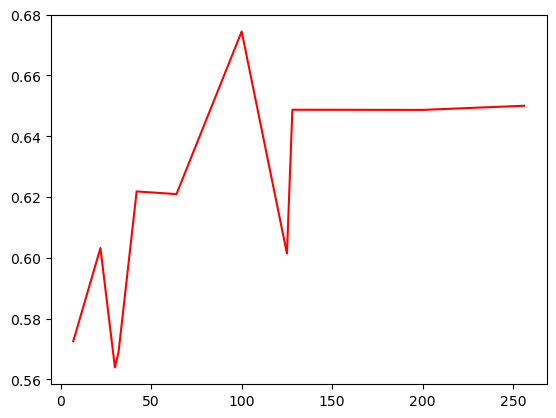

In [34]:
import matplotlib.pyplot as plt
plt.plot(rdf['nodes'],r2_score,'r')


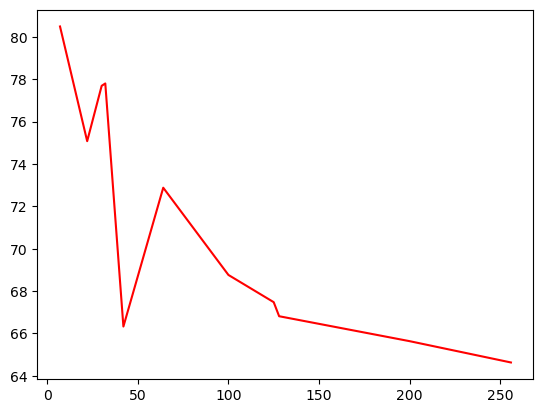

In [35]:
plt.plot(rdf['nodes'],rdf['mae'],'r')


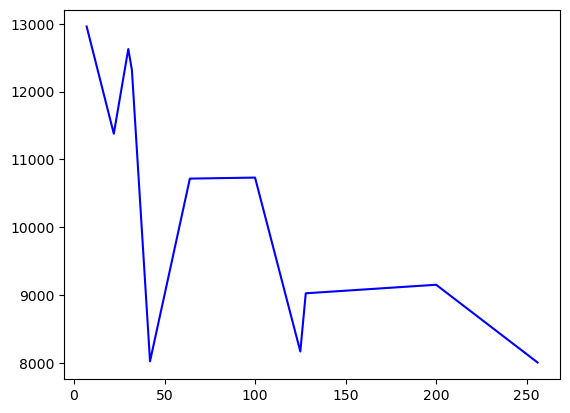

In [36]:
plt.plot(rdf['nodes'],rdf['wrongly_scheduled'] ,'b')

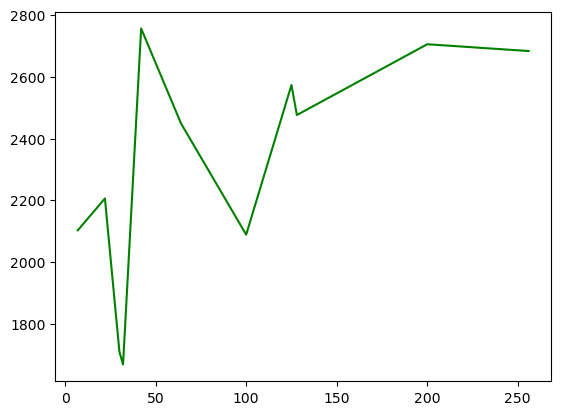

In [37]:
plt.plot(rdf['nodes'],rdf['num_missed'] ,'g')

In [38]:
print(wrongly_scheduled)

[12959, 11378, 12627, 12316, 8022, 10716, 10731, 8167, 9025, 9151, 8005]
